In [1]:
from IPython.display import display, Markdown
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from script.helpers import get_data
from script.visualization import report_cm

In [2]:
X_train, y_train = get_data(dates=['0514-1'], people=['jannis'])
X_train = X_train[y_train.hold != 'idle']
y_train = y_train[y_train.hold != 'idle']

X_test, y_test = get_data(dates=['0423', '0514-2'], people=['jannis'])
X_test = X_test[y_test.hold != 'idle']
y_test = y_test[y_test.hold != 'idle']

In [3]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train.hold)
    
y_pred = pd.Series(classifier.predict(X_test))
y_pred.index = y_test.index

# jannis

accuracy: 0.7839693437649689


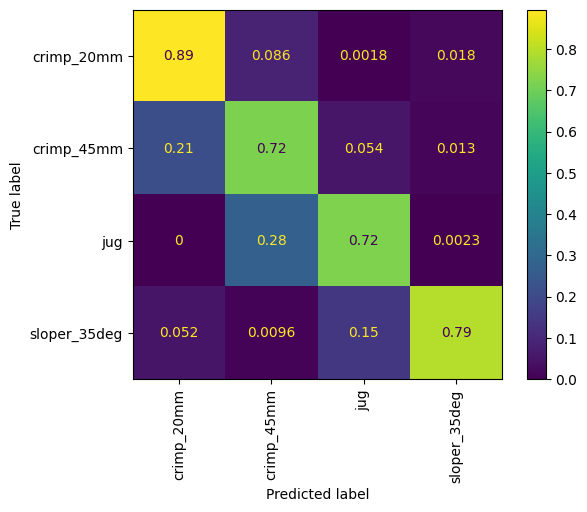

In [4]:
report_cm('jannis', y_test.hold, y_pred, classifier)